<a href="https://colab.research.google.com/github/Maharaja2627/TIME-SERIES-ANALYSIS/blob/main/EXP10/EXPT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse


In [4]:
df = pd.read_csv("/content/sample_data/Car_sales.csv")
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')
df = df.dropna(subset=['Latest_Launch'])

df = df[['Latest_Launch', 'Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower']]
df = df.dropna()

df = df.groupby('Latest_Launch').mean().sort_index()


In [5]:
df_diff = df.diff().dropna()


In [6]:
n_obs = 10
train = df_diff[:-n_obs]
test = df_diff[-n_obs:]


In [8]:
model = VAR(train)
results = model.fit(ic='aic')



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
forecast_input = train.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)


In [10]:
last_values = df.iloc[-n_obs - 1:-1]
forecast_values = forecast_df.cumsum() + last_values.values

actual = df[-n_obs:]
predicted = pd.DataFrame(forecast_values, index=test.index, columns=test.columns)


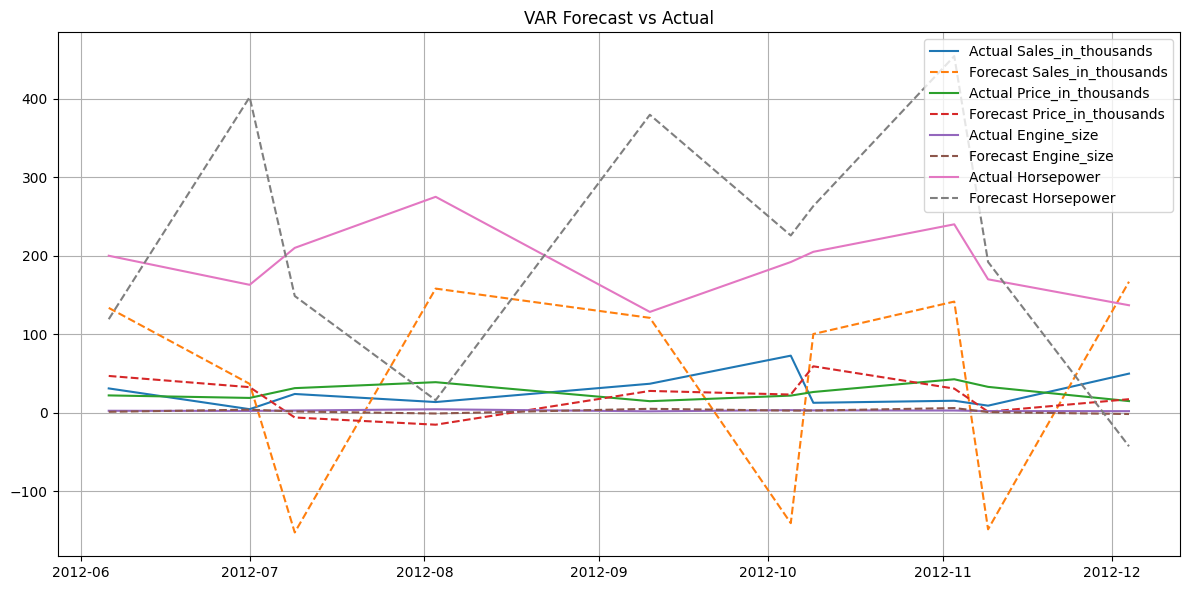

In [11]:
plt.figure(figsize=(12, 6))
for col in df.columns:
    plt.plot(actual.index, actual[col], label=f'Actual {col}')
    plt.plot(predicted.index, predicted[col], linestyle='--', label=f'Forecast {col}')
plt.legend()
plt.title('VAR Forecast vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
for col in df.columns:
    print(f'{col} RMSE: {rmse(actual[col], predicted[col]):.2f}')


Sales_in_thousands RMSE: 133.40
Price_in_thousands RMSE: 27.40
Engine_size RMSE: 2.65
Horsepower RMSE: 167.43
